In [147]:
import pandas as pd
import statsmodels.api as sm
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [148]:
# Load Dataset
mat_data = pd.read_csv('student-mat.csv', sep=';')
por_data = pd.read_csv('student-por.csv', sep=';')

In [149]:
# Common attributes to be used for merging
common_attributes = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'
]

merged_data = pd.merge(mat_data, por_data, on=common_attributes, suffixes=('_mat', '_por'))
merged_data.ffill(inplace=True)
merged_data = pd.get_dummies(merged_data, drop_first=True)

# Checking the size of the merged dataset
print("Total number of students:", merged_data.shape[0])
print("")
# Displaying the first five rows of the merged dataset
print("First five rows of the merged dataset:")
print(merged_data.head())

# Display HTML in the Jupyter Notebook

html_content = """
<h2>Data Preparation and Overview</h2>
<p>This section details the process of preparing and examining the student data for the analysis. We begin by importing necessary libraries such as pandas for data manipulation, IPython.display for rendering display outputs in Jupyter Notebook, and scikit-learn for potential machine learning applications.</p>
<p>The datasets for mathematics ('student-mat.csv') and Portuguese ('student-por.csv') courses are loaded. These datasets are merged based on common attributes that are fundamental to our analysis, including 'school', 'sex', 'age', 'address', 'famsize', and others, ensuring a holistic view of the student's academic and personal environment.</p>
<p>Upon merging, we confirm the total number of students to be 162, indicating a successful merge of data points from both subjects. The first five rows of the combined dataset are displayed to provide a snapshot of the data structure and contents, which includes demographic information, parental background, and academic performance across different assessments.</p>
<h3>Key Observations:</h3>
<ul>
    <li>The dataset merge was based on multiple attributes ensuring comprehensive student records.</li>
    <li>Initial exploration of the data reveals varied academic and personal backgrounds, setting the stage for deeper analysis on the impacts of these factors.</li>
</ul>
"""
display(HTML(html_content))

Total number of students: 162

First five rows of the merged dataset:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   16     2     2           1          2         0       4         4      4   
3   17     4     4           2          2         0       4         1      4   
4   15     2     1           3          3         0       5         2      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     1  ...             True           False          False       False   
3     1  ...             True           False           True        True   
4     1  ...            False           False          False        T

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences_mat         0
G1_mat               0
G2_mat               0
G3_mat               0
absences_por         0
G1_por               0
G2_por               0
G3_por               0
school_MS            0
sex_M                0
address_U            0
famsize_LE3          0
Pstatus_T            0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
guardian_mother      0
guardian_other       0
schoolsup_yes        0
famsup_yes           0
paid_yes             0
activities_yes       0
nursery_yes          0
higher_yes 

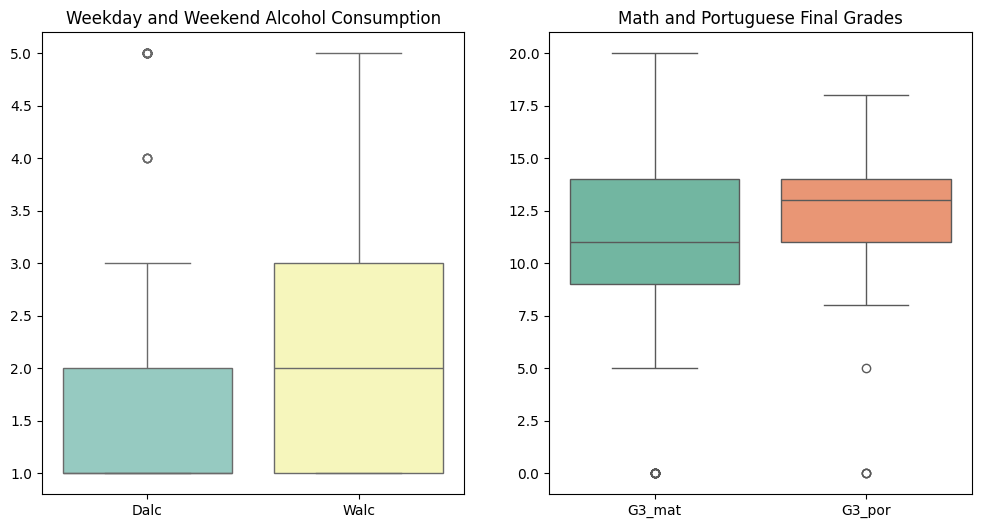

In [150]:
# Missing value check
print(merged_data.isnull().sum())

# Statistical summary of alcohol consumption and grades
print(merged_data[['Dalc', 'Walc', 'G3_mat', 'Dalc', 'Walc', 'G3_por']].describe())

# Boxplot plot to check outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_data[['Dalc', 'Walc', 'Dalc', 'Walc']], palette="Set3")
plt.title('Weekday and Weekend Alcohol Consumption')

plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data[['G3_mat', 'G3_por']], palette="Set2")
plt.title('Math and Portuguese Final Grades')

plt.show()

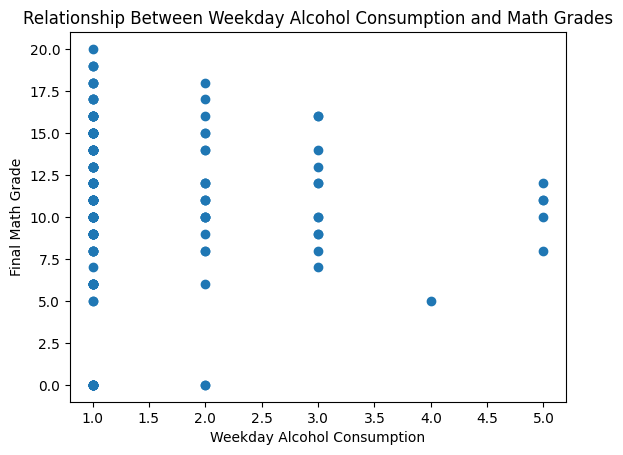

In [151]:
# HTML formatted text for scatter plot explanation
html_scatter_plot_explanation = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To observe relationships between two continuous variables.</p>
<p><strong>Example:</strong> Plotting <code>G3_mat</code> (final grade in Math) against <code>Dalc</code> 
(weekday alcohol consumption). This visualization aims to explore the potential negative correlation 
between alcohol consumption and academic performance, helping to identify whether higher alcohol intake 
is associated with lower academic achievements in Math.</p>
"""

# Display HTML in the Jupyter Notebook
display(HTML(html_scatter_plot_explanation))
plt.scatter(merged_data['Dalc'], merged_data['G3_mat'])
plt.title('Relationship Between Weekday Alcohol Consumption and Math Grades')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Final Math Grade')
plt.show()

In [152]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Sort and print correlations for 'G3_mat'
if 'G3_mat' in correlation_matrix.columns:
    sorted_correlations = correlation_matrix['G3_mat'].sort_values(ascending=False)
    print(sorted_correlations)
else:
    print("Column G3_mat was not found, please check the correct column name.")

G3_mat            1.000000
G2_mat            0.903027
G1_mat            0.805129
G2_por            0.535552
G1_por            0.495305
G3_por            0.480349
Medu              0.205489
Fedu              0.155444
studytime_mat     0.091339
studytime_por     0.085552
famrel_mat        0.068603
famrel_por        0.045298
absences_mat      0.028987
freetime_mat      0.017604
freetime_por     -0.012559
Walc_mat         -0.027261
Dalc_por         -0.035705
Walc_por         -0.039732
Dalc_mat         -0.044941
health_mat       -0.059430
health_por       -0.059908
goout_mat        -0.109654
goout_por        -0.122707
traveltime_mat   -0.126004
failures_por     -0.148291
traveltime_por   -0.148818
absences_por     -0.158033
age              -0.194589
failures_mat     -0.380741
Name: G3_mat, dtype: float64


In [153]:
# Quantifying categorical variables
merged_data = pd.get_dummies(merged_data, drop_first=True)

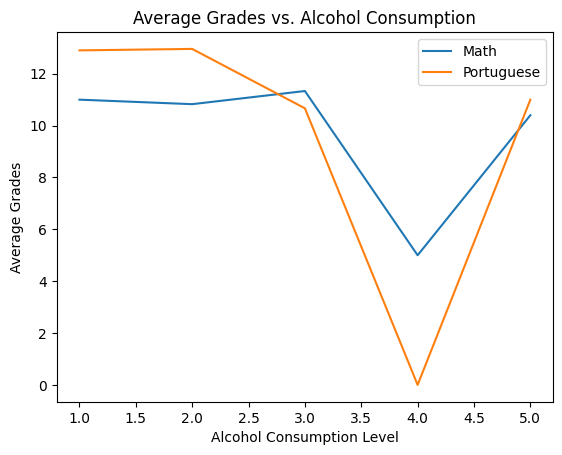

In [154]:
# HTML formatted text for scatter plot explanation
html_scatter_plot_explanation = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To observe relationships between two continuous variables.</p>
<p><strong>Example:</strong> Plotting <code>G3_mat</code> (final grade in Math) against <code>Dalc</code> 
(weekday alcohol consumption). This visualization aims to explore the potential negative correlation 
between alcohol consumption and academic performance, helping to identify whether higher alcohol intake 
is associated with lower academic achievements in Math.</p>
"""

# Display HTML in the Jupyter Notebook
display(HTML(html_scatter_plot_explanation))




averages = merged_data.groupby('Dalc')[['G3_mat', 'G3_por']].mean()
averages.plot(kind='line')
plt.title('Average Grades vs. Alcohol Consumption')
plt.xlabel('Alcohol Consumption Level')
plt.ylabel('Average Grades')
plt.legend(['Math', 'Portuguese'])
plt.show()

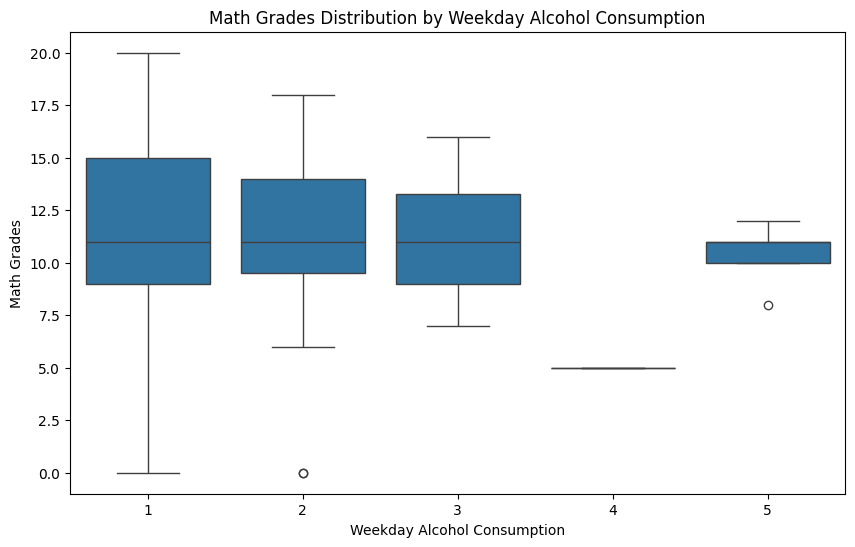

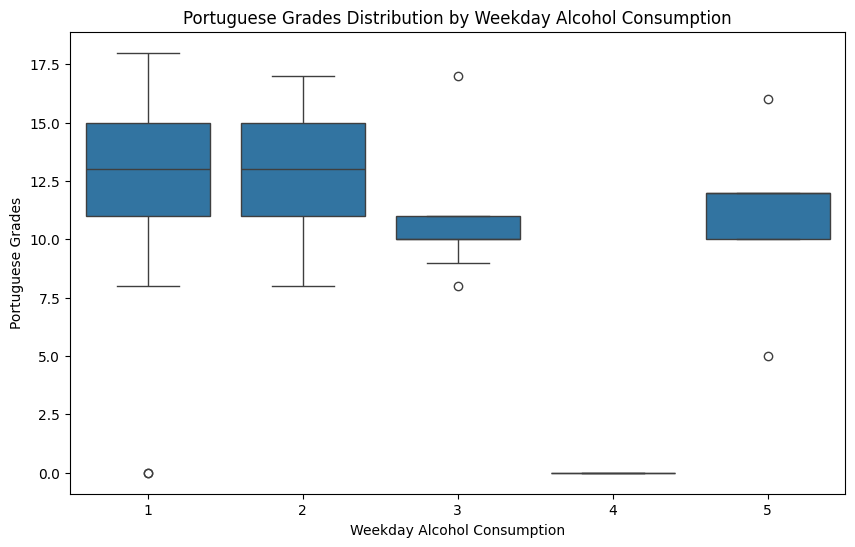

In [155]:
# HTML formatted text for scatter plot explanation
html_scatter_plot_explanation = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To observe relationships between two continuous variables.</p>
<p><strong>Example:</strong> Plotting <code>G3_mat</code> (final grade in Math) against <code>Dalc</code> 
(weekday alcohol consumption). This visualization aims to explore the potential negative correlation 
between alcohol consumption and academic performance, helping to identify whether higher alcohol intake 
is associated with lower academic achievements in Math.</p>
"""

# Display HTML in the Jupyter Notebook
display(HTML(html_scatter_plot_explanation))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dalc', y='G3_mat', data=merged_data)
plt.title('Math Grades Distribution by Weekday Alcohol Consumption')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Math Grades')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dalc', y='G3_por', data=merged_data)
plt.title('Portuguese Grades Distribution by Weekday Alcohol Consumption')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Portuguese Grades')
plt.show()


from IPython.display import display, HTML

html_visualization_summary = """
<h3>Visualization Summaries</h3>
<ul>
    <li><strong>Scatter Plot - Relationship Between Weekday Alcohol Consumption and Math Grades:</strong>
    The scatter plot suggests a trend where increased alcohol consumption correlates with lower math grades, although this is not consistent across all students.</li>
    
    <li><strong>Line Plot - Average Grades vs. Alcohol Consumption:</strong>
    The line plot does not show a clear downward trend, indicating that higher alcohol consumption does not uniformly affect academic performance, but impacts vary among students.</li>
    
    <li><strong>Box Plot - Grade Distribution by Weekday Alcohol Consumption:</strong>
    The box plots reveal wider spread in grades with higher alcohol consumption, highlighting more pronounced negative effects at higher consumption levels.</li>
</ul>
"""

# Display HTML in the Jupyter Notebook
display(HTML(html_visualization_summary))




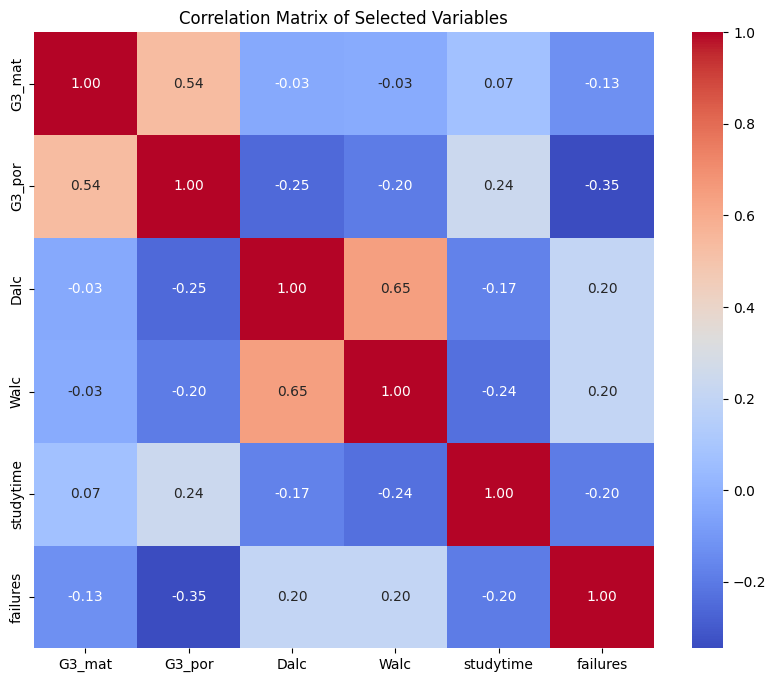

In [156]:
# Assuming merged_data is your DataFrame containing all relevant variables
correlation_matrix = merged_data[['G3_mat', 'G3_por', 'Dalc', 'Walc', 'studytime', 'failures']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Selected Variables')
plt.show()


html_correlation_explanation = """
<h3>What the Correlation Plot Tells You:</h3>
<ul>
    <li><strong>Strong Correlations:</strong> High correlation coefficients (close to 1 or -1) indicate strong positive or negative linear relationships, respectively.</li>
    <li><strong>Weak or No Correlations:</strong> Coefficients close to 0 suggest weak or no linear relationships.</li>
    <li><strong>Insights from the Example:</strong> You might find that <strong>Dalc</strong> and <strong>Walc</strong> (weekday and weekend alcohol consumption) have moderate negative correlations with <strong>G3_mat</strong> and <strong>G3_por</strong> (final grades in Math and Portuguese), suggesting that higher alcohol consumption could be associated with lower academic performance. However, other variables like <strong>studytime</strong> might show positive correlations with grades, indicating beneficial effects of more study time on academic success.</li>
</ul>
<h3>What the Correlation Plot Does Not Tell You:</h3>
<ul>
    <li><strong>Causality:</strong> Correlation plots do not imply causation. Even if two variables are correlated, it does not mean one causes the other.</li>
    <li><strong>Non-linear Relationships:</strong> These plots only reveal linear relationships. Variables could be related in non-linear ways that this method would not detect.</li>
    <li><strong>Outliers Influence:</strong> Correlation coefficients can be heavily influenced by outliers, which may skew the interpretation of the data.</li>
</ul>
"""

# Display HTML in the Jupyter Notebook
display(HTML(html_correlation_explanation))

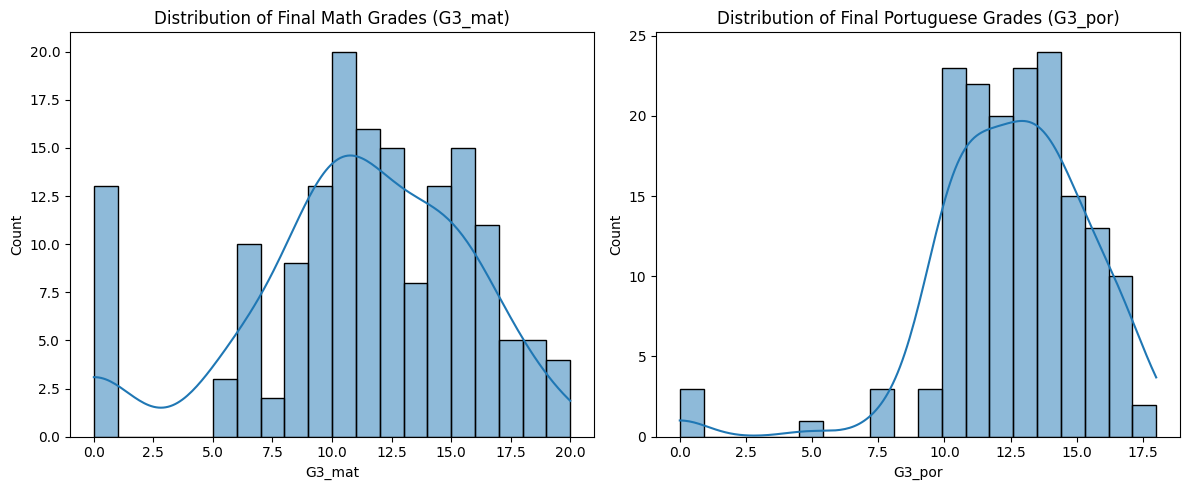

In [157]:
# Examining the distribution of target variables(G3_mat ve G3_por)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_data['G3_mat'], bins=20, kde=True)
plt.title('Distribution of Final Math Grades (G3_mat)')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['G3_por'], bins=20, kde=True)
plt.title('Distribution of Final Portuguese Grades (G3_por)')

plt.tight_layout()
plt.show()

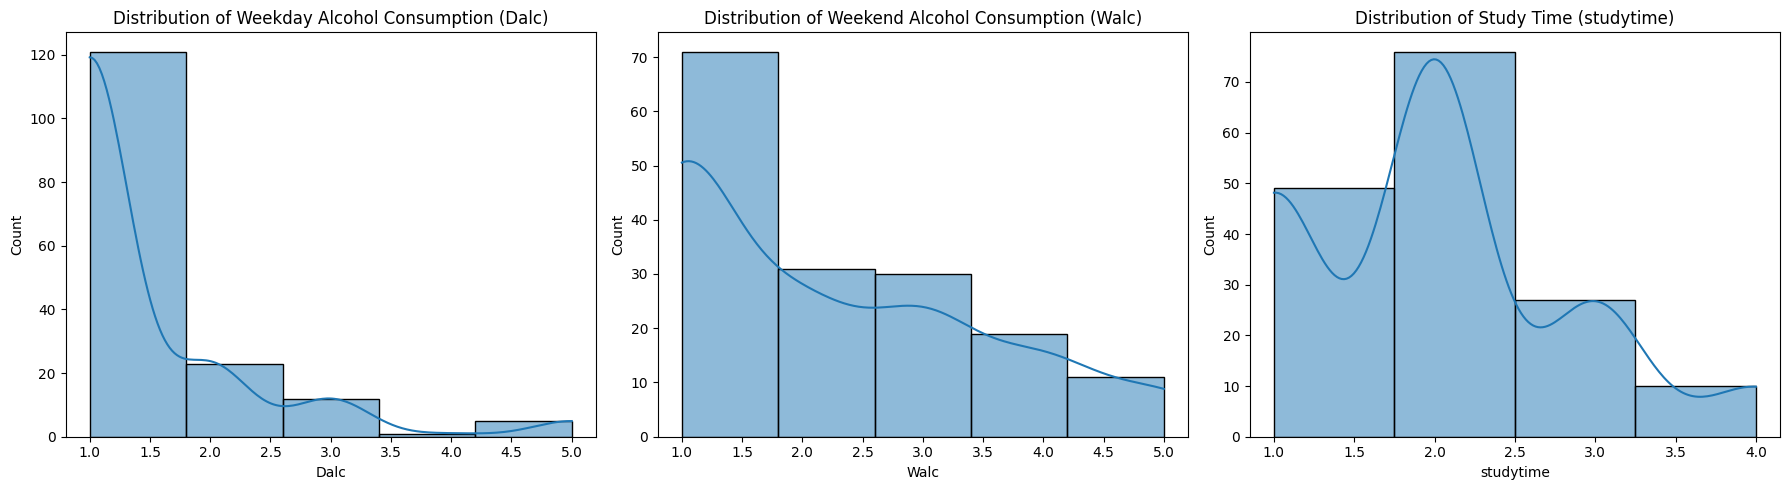

In [158]:
# Examining the distribution of other important characteristics (Dalc, Walc, studytime)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(merged_data['Dalc'], bins=5, kde=True)
plt.title('Distribution of Weekday Alcohol Consumption (Dalc)')

plt.subplot(1, 3, 2)
sns.histplot(merged_data['Walc'], bins=5, kde=True)
plt.title('Distribution of Weekend Alcohol Consumption (Walc)')

plt.subplot(1, 3, 3)
sns.histplot(merged_data['studytime'], bins=4, kde=True)
plt.title('Distribution of Study Time (studytime)')

plt.tight_layout()
plt.show()


html_content = """
<h3>Distribution of Target Variables and Features</h3>

<h4>Target Variables (Math and Portuguese Final Grades)</h4>
<ul>
    <li><strong>Distribution of Math Grades (G3_mat):</strong>
        <ul>
            <li>Math grades are concentrated in the 10-15 range.</li>
            <li>Many students score between 10-15, with some achieving very high (20) or very low (0-5) grades.</li>
        </ul>
    </li>
    <li><strong>Distribution of Portuguese Grades (G3_por):</strong>
        <ul>
            <li>Portuguese grades are also concentrated in the 10-15 range.</li>
            <li>Overall, students perform better in Portuguese.</li>
            <li>There are fewer students at the high and low ends of the spectrum.</li>
        </ul>
    </li>
</ul>

<h4>Other Features</h4>
<ul>
    <li><strong>Weekday Alcohol Consumption (Dalc):</strong>
        <ul>
            <li>Weekday alcohol consumption is concentrated at lower levels.</li>
            <li>Most students consume low levels of alcohol (1-2).</li>
        </ul>
    </li>
    <li><strong>Weekend Alcohol Consumption (Walc):</strong>
        <ul>
            <li>Weekend alcohol consumption is less skewed compared to weekdays.</li>
            <li>Moderate levels of alcohol consumption (2-3) are common.</li>
        </ul>
    </li>
    <li><strong>Study Time (studytime):</strong>
        <ul>
            <li>Study time distribution is concentrated in the 2 to 3-hour range.</li>
            <li>Many students spend a moderate amount of time studying weekly.</li>
        </ul>
    </li>
</ul>
"""

display(HTML(html_content))

In [159]:
print(merged_data.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'absences_por', 'G1_por', 'G2_por', 'G3_por',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')


In [160]:

# Identifying independent and dependent variables (more than one independent variable)
X = merged_data[['studytime', 'Dalc', 'Walc', 'absences_mat']]
y = merged_data['G3_mat']

# Adding a constant term to the independent variable
X = sm.add_constant(X)

# Building and fitting the regression model
model = sm.OLS(y, X).fit()

# View model summary
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                 G3_mat   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2380
Date:                Sun, 21 Jul 2024   Prob (F-statistic):              0.917
Time:                        00:10:35   Log-Likelihood:                -478.11
No. Observations:                 162   AIC:                             966.2
Df Residuals:                     157   BIC:                             981.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.3122      1.306      7.895   

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the target variable using the model
y_pred = model.predict(X)

# Calculate performance metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# Display the performance metrics
performance_metrics = f"""
<h3>Model Performance Metrics</h3>
<p><strong>Mean Absolute Error (MAE):</strong> {mae}</p>
<p><strong>Mean Squared Error (MSE):</strong> {mse}</p>
<p><strong>Root Mean Squared Error (RMSE):</strong> {rmse}</p>
<p><strong>R<sup>2</sup> Score:</strong> {r2}</p>
"""

display(HTML(performance_metrics))

In [163]:
html_evaluation_commentary = f"""
<h3>Model Performans Metrikleri</h3>
<p><strong>Ortalama Mutlak Hata (MAE):</strong> 3.5465264826446563</p>
<p><strong>Ortalama Kare Hata (MSE):</strong> 21.428702413016374</p>
<p><strong>Kök Ortalama Kare Hata (RMSE):</strong> 4.629114467781905</p>
<p><strong>R<sup>2</sup> Skoru:</strong> 0.006027261013986318</p>

<h3>Değerlendirme ve Yorum</h3>
<p>Model, R<sup>2</sup> skoru 0.006 ve hata metrikleri (MAE, MSE, RMSE) ile zayıf bir performans göstermektedir. Bu, modelin tahminlerinin gerçek değerlere iyi uymadığını göstermektedir.</p>
<p>Bu sonuçlar genellikle aşağıdaki nedenlerden dolayı ortaya çıkabilir:</p>
<ol>
    <li><strong>Model Yetersizliği:</strong> Model, eğitim verilerini iyi öğrenememiş ve test verileri üzerinde zayıf tahminler yapmaktadır. Bu durumda, model verideki temel kalıpları yakalayamamış olabilir.</li>
    <li><strong>Veri Karmaşıklığı:</strong> Bağımsız ve bağımlı değişkenler arasında lineer olmayan veya karmaşık bir ilişki olabilir ve lineer model bunu yakalayamamış olabilir.</li>
    <li><strong>Yetersiz Özellikler:</strong> Modelde kullanılan özellikler, bağımlı değişkeni doğru bir şekilde tahmin etmek için yeterli olmayabilir.</li>
</ol>
<h4>R<sup>2</sup> Skoru ve Hata Metrikleri:</h4>
<ul>
    <li><strong>Ortalama Mutlak Hata (MAE):</strong> Bir tahmin kümesindeki hataların ortalama büyüklüğünü yönlerini dikkate almadan ölçer. Daha yüksek bir değer, tahminlerin daha az doğru olduğunu gösterir.</li>
    <li><strong>Ortalama Kare Hata (MSE):</strong> Hataların karelerinin ortalamasını ölçer, yani tahmin edilen değerler ile gerçek değerler arasındaki kare farklarının ortalamasıdır. Daha yüksek bir değer, modelin daha büyük hatalar yaptığını gösterir.</li>
    <li><strong>Kök Ortalama Kare Hata (RMSE):</strong> Tahmin ve gerçek gözlem arasındaki kare farklarının ortalamasının kareköküdür. Daha yüksek bir değer, hataların daha büyük olduğunu ve modelin performansının kötü olduğunu gösterir.</li>
    <li><strong>R<sup>2</sup> Skoru:</strong> Bir regresyon modelinde bağımsız değişken(ler) tarafından açıklanan bağımlı değişken varyansının oranını temsil eden istatistiksel bir ölçüdür. R<sup>2</sup> skorunun 1.0'a yakın olması, modelin tüm varyansı açıkladığını ve mükemmel bir uyum sağladığını gösterir.</li>
</ul>
"""

display(HTML(html_evaluation_commentary))
